In [212]:
#pip install rdkit pandas numpy seaborn sklearn

In [213]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [214]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

In [215]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo), mol))

# 200+ Feature isomer

In [216]:

def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

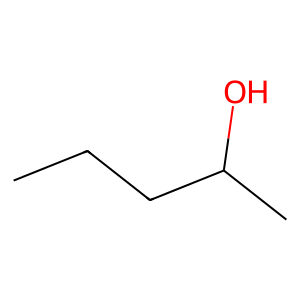

In [217]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

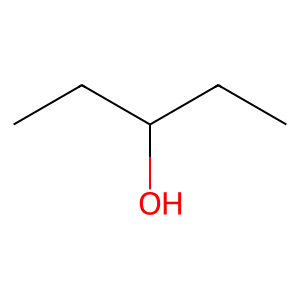

In [218]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [219]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X

,SMILE
0,CCCC(C)O
1,CCC(CC)O


In [220]:
Mol_descriptors,desc_names = RDkit_descriptors(TEST_X["SMILE"])
TEST_X_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
TEST_X_with_200_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.333333,7.333333,3.521250,-3.765625,0.536832,88.15,76.054,88.088815,38,0,...,0,0,0,0,0,0,0,0,0,0
1,7.406250,7.406250,3.533333,-3.739583,0.536832,88.15,76.054,88.088815,38,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
test = TEST_X_with_200_descriptors.diff()[1:]
zero_mask = test.eq(0)
zero_mask2=test.drop(columns=zero_mask.columns[(zero_mask == True).any()])
zero_mask3=TEST_X_with_200_descriptors[zero_mask2.columns]
zero_mask3

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,Kappa3,LabuteASA,PEOE_VSA6,PEOE_VSA7,SMR_VSA5,EState_VSA1,VSA_EState1,VSA_EState3,VSA_EState7,VSA_EState8
0,7.333333,7.333333,3.521250,-3.765625,0.210431,-0.393419,0.393419,0.210431,2.500000,3.500000,...,3.960000,55.939569,13.224817,13.224817,32.529652,32.529652,84.396042,3.537708,-11.117708,-7.066042
1,7.406250,7.406250,3.533333,-3.739583,0.210444,-0.393153,0.393153,0.210444,2.166667,2.833333,...,2.212525,55.939569,13.703784,12.745850,32.529652,32.529652,84.378750,3.567083,-11.129167,-7.066667


In [222]:
name_csv = name1+" + "+name2+".csv"
zero_mask3.to_csv(name_csv, index=False)

# 200+ Feature same formula, diff func. gr.

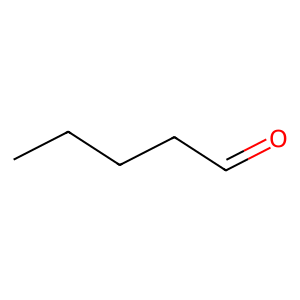

In [223]:
name1 = "CCCCC=O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

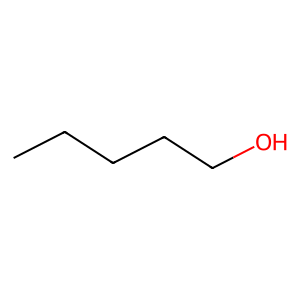

In [224]:
name2 = "CCCCCO"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [225]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X

,SMILE
0,CCCCC=O
1,CCCCCO


In [226]:
Mol_descriptors,desc_names = RDkit_descriptors(TEST_X["SMILE"])
TEST_X_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
TEST_X_with_200_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.587102,10.587102,2.008681,-3.634838,0.374279,86.134,76.054,86.073165,36,0,...,0,0,0,0,0,0,0,0,0,0
1,7.299583,7.299583,3.414622,-3.754167,0.513281,88.150,76.054,88.088815,38,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
test = TEST_X_with_200_descriptors.diff()[1:]
zero_mask = test.eq(0)
zero_mask2=test.drop(columns=zero_mask.columns[(zero_mask == True).any()])
zero_mask3=TEST_X_with_200_descriptors[zero_mask2.columns]
zero_mask3

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,...,FractionCSP3,NHOHCount,NumHDonors,NumRotatableBonds,MolLogP,MolMR,fr_Al_OH,fr_C_O,fr_C_O_noCOO,fr_aldehyde
0,10.587102,10.587102,2.008681,-3.634838,0.374279,86.134,86.073165,36,0.119490,-0.303403,...,0.8,0,0,4,1.3755,25.5890,0,1,1,1
1,7.299583,7.299583,3.414622,-3.754167,0.513281,88.150,88.088815,38,0.210037,-0.396377,...,1.0,1,1,5,1.1689,26.6108,1,0,0,0


In [228]:
name_csv = name1+" + "+name2+".csv"
zero_mask3.to_csv(name_csv, index=False)

# Morgan_fingerprint

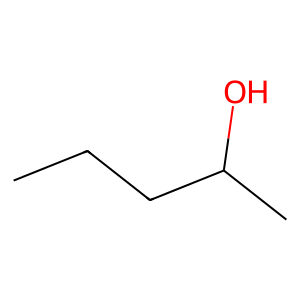

In [229]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

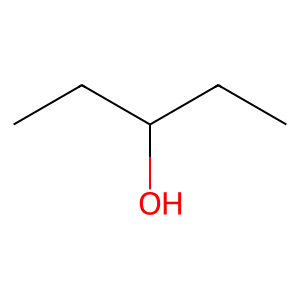

In [230]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [231]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X["molecule"] = TEST_X["SMILE"].apply(lambda x: Chem.MolFromSmiles(x))
TEST_X["morgan_fp"] = TEST_X["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True))
TEST_X

,SMILE,molecule,morgan_fp
0,CCCC(C)O,<rdkit.Chem.rdchem.Mol object at 0x000001AFA51...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CCC(CC)O,<rdkit.Chem.rdchem.Mol object at 0x000001AFA51...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [232]:
#rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True)

In [233]:
def SmileToMorganFP_df(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_array = np.array(morgan_fp)
    morgan_dataframe = pd.DataFrame(morgan_array)
    morgan_dataframe_row = morgan_dataframe.T
    return morgan_dataframe_row
def SmileToMorganFP(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_bit = morgan_fp.GetOnBits()
    morgan_array = np.array(morgan_fp)
    return morgan_array,tuple(morgan_bit)

In [234]:
# STEP 0 
'''
name1 = "CCCCCCCCCO"
name2 = "CCCCCCCCCCO"
'''

'\nname1 = "CCCCCCCCCO"\nname2 = "CCCCCCCCCCO"\n'

In [235]:
# STEP 1
fp1 = SmileToMorganFP(name1)
fp2 = SmileToMorganFP(name2)

In [236]:
# STEP 2
# Find Diff Feature

fp_bit1=fp1[1]
fp_bit2=fp2[1]
all_diff = set(fp_bit1).symmetric_difference(set(fp_bit2))
diff2_from1 = set(fp_bit1)-set(fp_bit2)
diff1_from2 = set(fp_bit2)-set(fp_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 [42, 47, 144, 193, 243]
M2 Diff from M1: 
 [47, 144, 243]
M1 Diff from M2: 
 [42, 193]


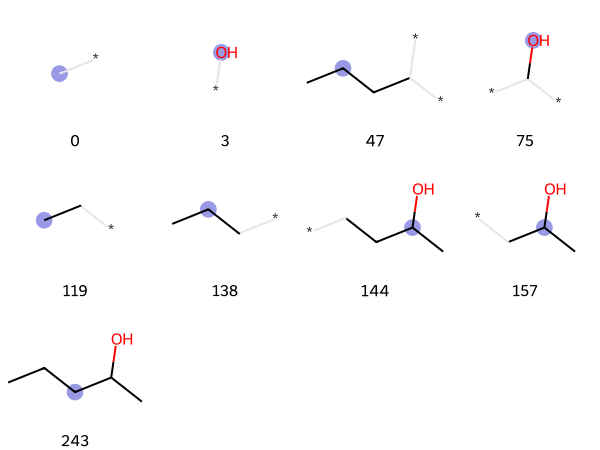

In [237]:
onbits = {}
mf = rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True, bitInfo=onbits)
all_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

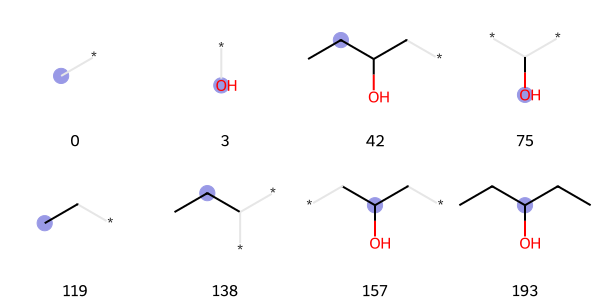

In [238]:
onbits = {}
mf = rdMolDescriptors.GetMorganFingerprintAsBitVect(m2, radius=4, nBits=250, useFeatures=True, useChirality=True, bitInfo=onbits)
all_fragments = [(m2, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

In [239]:
'''
onbits = {}
all_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])
'''
#all_fragments

'\nonbits = {}\nall_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]\nDraw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])\n'

In [240]:
print(fp1[0])
print(fp2[0])

# print On bits
print("Index of On bits 1: \n",fp_bit1)
print("Index of On bits 2: \n",fp_bit2)
# how many bits are On?
print("Number of On bits 1: \n",len(fp_bit1))
print("Number of On bits 2: \n",len(fp_bit2))

print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

print("\n250 BITS")

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# MACCS

In [241]:
import requests
CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"
def smiles_to_iupac(smiles):
    rep = "iupac_name"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

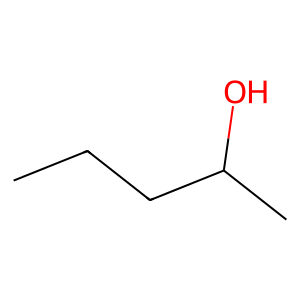

In [242]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

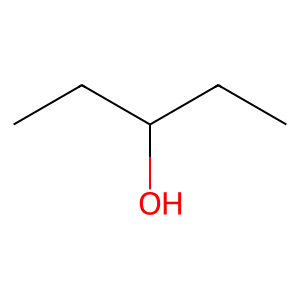

In [243]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [244]:
'''
name1 = "CCCCCCCCCO"
name2 = "CCCCCCCCCCO"
'''

'\nname1 = "CCCCCCCCCO"\nname2 = "CCCCCCCCCCO"\n'

In [245]:
# Generate MACCS (Molecular ACCess System) keys
from rdkit.Chem import MACCSkeys
Mkeys1 = MACCSkeys.GenMACCSKeys(m1)
Mkeys2 = MACCSkeys.GenMACCSKeys(m2)
# Use numpy array to see On and Off bits
arr_mkey1 = np.array(Mkeys1)
arr_mkey2 = np.array(Mkeys2)

#print(arr_mkey1)
#print(arr_mkey2)

arr_bit1 = tuple(Mkeys1.GetOnBits())
arr_bit2 = tuple(Mkeys2.GetOnBits())

# print On bits
print("Index of On bits 1:",tuple(Mkeys1.GetOnBits()))
print("Index of On bits 2:",tuple(Mkeys2.GetOnBits()))
# how many bits are On?
print("Number of On bits 1: ",len(Mkeys2.GetOnBits()))
print("Number of On bits 2: ",len(Mkeys2.GetOnBits()))


Index of On bits 1: (90, 104, 114, 115, 116, 118, 132, 139, 147, 149, 152, 155, 157, 160, 164)
Index of On bits 2: (104, 114, 116, 132, 139, 149, 152, 155, 157, 160, 164)
Number of On bits 1:  11
Number of On bits 2:  11


In [246]:
all_diff = set(arr_bit1).symmetric_difference(set(arr_bit2))
diff2_from1 = set(arr_bit1)-set(arr_bit2)
diff1_from2 = set(arr_bit2)-set(arr_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 [90, 115, 118, 147]
M2 Diff from M1: 
 [90, 115, 118, 147]
M1 Diff from M2: 
 []


In [247]:
print(arr_mkey1)
print(arr_mkey2)

# print On bits
print("Index of On bits 1: \n",tuple(Mkeys1.GetOnBits()))
print("Index of On bits 2: \n",tuple(Mkeys2.GetOnBits()))
# how many bits are On?
print("Number of On bits 1: \n",len(Mkeys2.GetOnBits()))
print("Number of On bits 2: \n",len(Mkeys2.GetOnBits()))

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0]
Index of On bits 1: 
 (90, 104, 114, 115, 116, 118, 132, 139, 147, 149, 152, 155, 157, 160, 164)
Index of On bits 2: 
 (104, 114, 116, 132, 139, 149, 152, 155, 157, 160, 164)
Number of On bits 1: 
 11
Number of On bits 2: 
 11
All Diff index: 
 [90, 115, 118, 147]
M2 Diff from M1: 
 [90, 115, 118, 147]
M1 Diff from M2:

In [248]:
#90:  ('[$([!#6;!#1;!H0]~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[CH2;R]1)]', 0),  # QHAACH2A
#115: ('[CH3]~*~[CH2]~*', 0),  # CH3ACH2A
#118: ('[$(*~[CH2]~[CH2]~*),$(*1~[CH2]~[CH2]1)]', 1),  # ACH2CH2A > 1
#147: ('[$(*~[CH2]~[CH2]~*),$([R]1@[CH2;R]@[CH2;R]1)]', 0),  # ACH2CH2A

# Interact find Index

In [249]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo), mol))

In [250]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(m1, maxPath=5, bitInfo=rdkbi)
# show 10 of the set bits:
list(rdkfp.GetOnBits())[:10]

[56, 148, 229, 491, 562, 568, 709, 747, 875, 1067]

In [251]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(m1),
         bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(m2),
         bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));

interactive(children=(Dropdown(description='bitIdx', options=(56, 148, 229, 491, 562, 568, 709, 747, 875, 1067…

interactive(children=(Dropdown(description='bitIdx', options=(56, 148, 229, 491, 562, 568, 709, 747, 875, 1067…

# Increase Morgan_fp Bit

In [252]:
########   Prepare Data     ########
#Import Data
df = pd.read_excel("DataTb.xlsx",sheet_name="AllDataSet")

#Select feature for data
X_data= df.drop(columns ={"Name","Tb","CAS","Type","Formular","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","C","Double", "Triple", "Bracket", "Cyclic"})
Y_data= df["Tb"]


In [253]:
#get Morgan_fp of all substance ex 560 datapoint
mols = []
SMILES=np.array(X_data["SMILES"])
for SMILE in SMILES:
    mol = Chem.MolFromSmiles(SMILE)
    mols.append(mol)

# we get 560 fp in FP_all
# FP_all = [fp_1, fp_2, ... , fp_560]
# Loop 

# see CURRENTLY_USE in 256, 512, ..., 2048 bit
# np.logical_or(FP_all).sum()
# >>> 156 bit use in 256 bit

In [254]:
# Looping
bits = [1024, 2048, 4096, 8192, 16384, 32768, 65536]
#mols = [m1, m2, ..., m560]
#mols = [m1, m2]

#32768   1 min
#65536   1 min
unique=[]
for bit in bits:
    FPs = []
    infos = []
    for mol in mols:
        info = {}
        FPs.append(AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=bit, bitInfo=info, useFeatures=True))
        infos.append(info)
    unique.append(np.logical_or.reduce(FPs).sum())

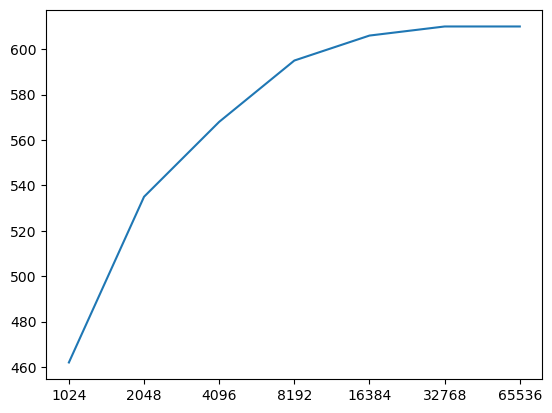

In [255]:
fig1,ax1 =plt.subplots()
ax1.plot(unique)
xticks = plt.xticks(range(len(bits)),bits)
ax1.yaxis.get_major_locator().set_params(integer=True)

# Morgan_fp RF

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [257]:
# %%
# Get Data

# Import Data
df = pd.read_excel("DataTb.xlsx",sheet_name="AllDataSet")

# X:SMILE, Y:boiling Temp
X_data= df.drop(columns ={"Name","Tb","CAS","Type","Formular","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","C","Double", "Triple", "Bracket", "Cyclic"})
Y_data= df["Tb"]

In [258]:
# %%
# Feature Engineering

# get Morgan_fp of all substance ex 560 datapoint
mols = []
FPs = []
infos = []

SMILES=np.array(X_data["SMILES"])
for SMILE in SMILES:
    info = {}
    
    # Define molecule
    mol = Chem.MolFromSmiles(SMILE)
    # Get Fingerprint
    FPs.append(AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048, bitInfo=info, useFeatures=True))
    
    mols.append(mol)
    infos.append(info)

arr_FP=np.array(FPs)
# >>> (560, 2048)

df_arr_FP = pd.DataFrame(arr_FP)

# FOR INSECPTION
#new_X_data = X_data.join(df_arr_FP)
#new_X_data.to_csv("560_morgan_fp.csv")

In [259]:
# %% 
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(df_arr_FP, Y_data,test_size=0.25,random_state=42)

In [260]:
# %%
# Modeling

from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state = 0, n_jobs=100)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=100, random_state=0)

In [261]:
# %%
# Prediction & Validation

# Train set
y_predict_train = RF_model.predict(X_train)
table_train = pd.DataFrame({
    "Predict" : y_predict_train,
    "EXP" : y_train,
})
#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = RF_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
#y_predict_total = RF_model.predict(X_data)
#mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
#rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
#R2_total = r2_score(Y_data, y_predict_total)

# Table Score
Morgan_fp__ML_RF = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test],
        "RMSE":[rmse_train, rmse_test],
        "R2"  :[R2_train, R2_test]
    }
Morgan_fp__ML_RF = pd.DataFrame(data)
#Morgan_fp__ML_RF.to_csv('560 Morgan_fp ML-RF.csv', index=False)
Morgan_fp__ML_RF

,MAPE,RMSE,R2
0,0.030635,16.808339,0.916341
1,0.078622,35.151158,0.679614


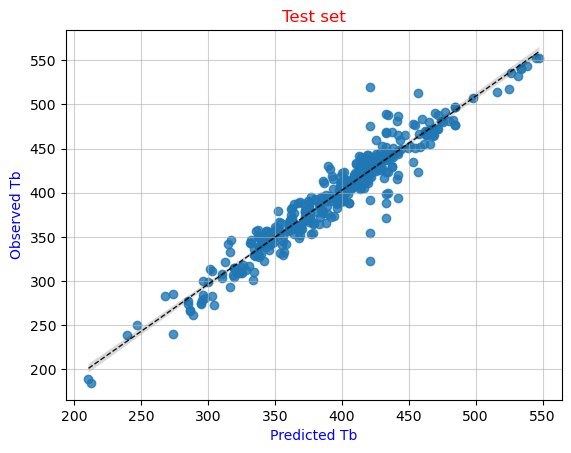

In [262]:
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp k-fold+RF

# Morgan_fp SVM-LinearSVR

In [263]:
# %%
# Modeling

from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVM_regr_model = make_pipeline(StandardScaler(),
                               LinearSVR(dual="auto", random_state=0, tol=1e-5))
SVM_regr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual='auto', random_state=0, tol=1e-05))])

In [264]:
# %%
# Prediction & Validation

# Train set
y_predict_train = SVM_regr_model.predict(X_train)

#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = SVM_regr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
#y_predict_total = SVM_regr_model.predict(X_data)
#mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
#rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
#R2_total = r2_score(Y_data, y_predict_total)

In [265]:
# Table Score
table_train = pd.DataFrame({
    "Predict" : y_predict_train,
    "EXP" : y_train,
})

Morgan_fp__ML_RF = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test],
        "RMSE":[rmse_train, rmse_test],
        "R2"  :[R2_train, R2_test]
    }
Morgan_fp__ML_SVR = pd.DataFrame(data)
#Morgan_fp__ML_RF.to_csv('560 Morgan_fp ML-RF.csv', index=False)
Morgan_fp__ML_SVR

,MAPE,RMSE,R2
0,0.040732,33.243439,0.672754
1,0.075251,39.015267,0.605304


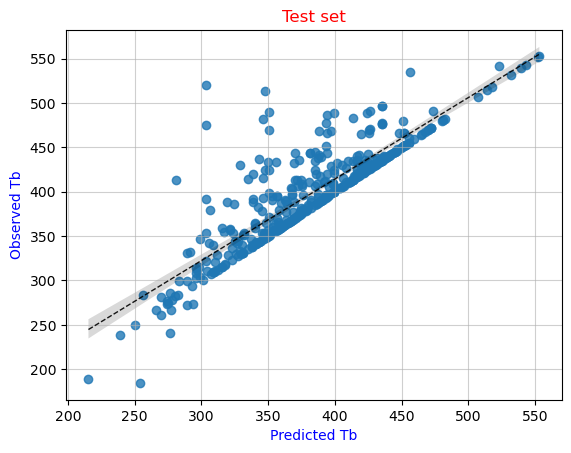

In [266]:
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp SVM-NuSVR

In [267]:
# %%
# Modeling

from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVM_regr_model = make_pipeline(StandardScaler(), NuSVR(C=1.0, nu=0.1))
SVM_regr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvr', NuSVR(nu=0.1))])

In [268]:
# %%
# Prediction & Validation

# Train set
y_predict_train = SVM_regr_model.predict(X_train)

#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = SVM_regr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
#y_predict_total = SVM_regr_model.predict(X_data)
#mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
#rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
#R2_total = r2_score(Y_data, y_predict_total)

In [269]:
# Table Score
table_train = pd.DataFrame({
    "Predict" : y_predict_train,
    "EXP" : y_train,
})

Morgan_fp__ML_RF = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test],
        "RMSE":[rmse_train, rmse_test],
        "R2"  :[R2_train, R2_test]
    }
Morgan_fp__ML_SVR = pd.DataFrame(data)
#Morgan_fp__ML_RF.to_csv('560 Morgan_fp ML-RF.csv', index=False)
Morgan_fp__ML_SVR

,MAPE,RMSE,R2
0,0.120649,56.430350,0.057050
1,0.138968,60.333668,0.056128


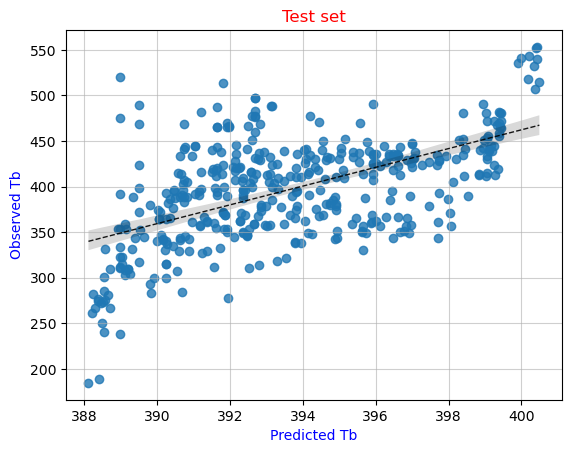

In [270]:
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp SVM-SVR

In [271]:
# %%
# Modeling

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVM_regr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVM_regr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [272]:
# %%
# Prediction & Validation

# Train set
y_predict_train = SVM_regr_model.predict(X_train)

#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = SVM_regr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
#y_predict_total = SVM_regr_model.predict(X_data)
#mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
#rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
#R2_total = r2_score(Y_data, y_predict_total)

In [273]:
# Table Score
table_train = pd.DataFrame({
    "Predict" : y_predict_train,
    "EXP" : y_train,
})

Morgan_fp__ML_RF = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test],
        "RMSE":[rmse_train, rmse_test],
        "R2"  :[R2_train, R2_test]
    }
Morgan_fp__ML_SVR = pd.DataFrame(data)
#Morgan_fp__ML_RF.to_csv('560 Morgan_fp ML-RF.csv', index=False)
Morgan_fp__ML_SVR

,MAPE,RMSE,R2
0,0.112178,52.698894,0.177632
1,0.132532,57.094918,0.154743


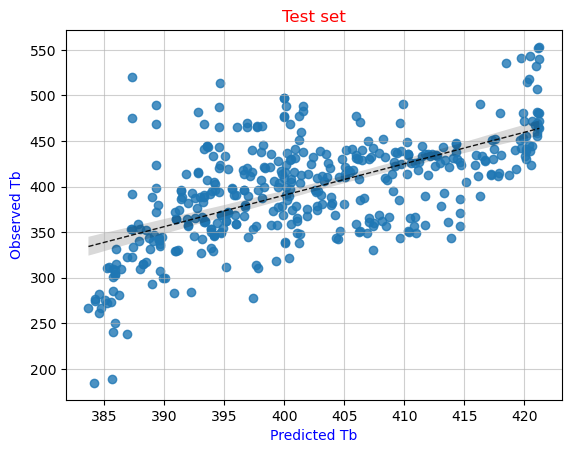

In [274]:
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp Feature Selection with DT

In [275]:
# https://youtu.be/PHU3qLwncDI?t=1006